In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [360]:
df = pd.read_csv("/content/gabungan-semua.csv", encoding='latin-1')
df.head()


,Name,Rating,Date,Review
0,Vivi Novitasari,1/5,sebulan lalu di,Saya bberapa hari mengantar teman saya mengina...
1,Rollowe Sembiring,1/5,4 bulan lalu di,AC Kamar tidak dingin. Makanan yg dihidangkan ...
2,watchdoctor_indonesia,1/5,8 bulan lalu di,"parkir mobil susah, ada slot lobby tapi ditutu..."
3,muhammad arzha,1/5,sebulan lalu di,hotel terburuk yg pernah saya temui dengan pel...
4,Terus Enak TV,1/5,setahun lalu di,"turun makan jam 7, ehh cuma kebagian bubur, so..."


In [361]:
df.drop(columns = ['Name', 'Date'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()


,Rating,Review
0,1/5,Saya bberapa hari mengantar teman saya mengina...
1,1/5,AC Kamar tidak dingin. Makanan yg dihidangkan ...
2,1/5,"parkir mobil susah, ada slot lobby tapi ditutu..."
3,1/5,hotel terburuk yg pernah saya temui dengan pel...
4,1/5,"turun makan jam 7, ehh cuma kebagian bubur, so..."


In [362]:
# Fungsi untuk mengubah nilai yang tidak standar menjadi nilai yang diinginkan
def clean_rating(rating):
    if ',' in rating:
        return rating.replace(',', '')
    else:
        return rating

# Menggunakan fungsi clean_rating untuk membersihkan nilai 'Rating'
df['Rating'] = df['Rating'].apply(clean_rating)

# Sekarang, kita bisa menggunakan operasi untuk membuat semua rating menjadi 'float' dan kemudian mengonversinya ke integer
df['Rating'] = df['Rating'].str.replace('/5', '').astype(float).astype(int)

# Mengganti rating 4,1 dengan 4
df.loc[df['Rating'] == 41, 'Rating'] = 4

# Tampilkan DataFrame setelah perubahan
print(df)


      Rating                                             Review
0          1  Saya bberapa hari mengantar teman saya mengina...
1          1  AC Kamar tidak dingin. Makanan yg dihidangkan ...
2          1  parkir mobil susah, ada slot lobby tapi ditutu...
3          1  hotel terburuk yg pernah saya temui dengan pel...
4          1  turun makan jam 7, ehh cuma kebagian bubur, so...
...      ...                                                ...
1414       3  Bantalnya seperti di hotel2 yg lain, 1 bed 2 b...
1415       5  2 malam di horaios hotel,625 superior room\nny...
1416       5  Untuk makan, pelayanan bagus ,begitu ada yang ...
1417       4  Sebenarnya Hotel ini bagus, kamar lumayan lelu...
1418       5  Cukup nyaman bisa menginap di hotel berbintang...

[1419 rows x 2 columns]


In [363]:
df['Rating'].value_counts()

Rating
5    644
4    297
1    175
2    168
3    135
Name: count, dtype: int64

# **Jumlah Review berdasarkan score/rating**

<Axes: xlabel='Rating'>

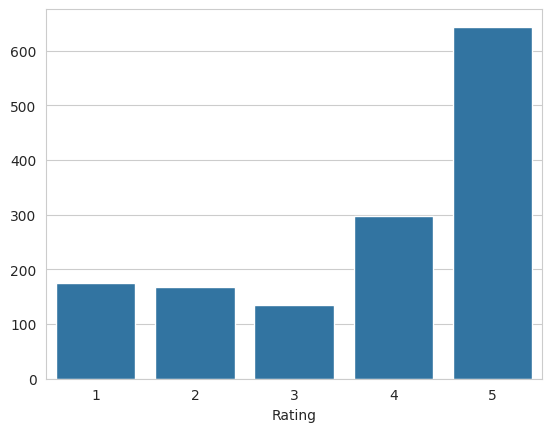

In [364]:
import seaborn as sns
result = df.groupby(['Rating']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

# **Kolom Sentimen**

In [365]:
sentimen = []
for index, row in df.iterrows():
    rating = int(row['Rating'])  # Konversi nilai rating menjadi integer
    if rating > 3:
        sentimen.append(1)  # Rating 4 dan 5 dianggap positif
    else:
        sentimen.append(-1)  # Rating 1, 2, dan 3 dianggap negatif
df['sentiment'] = sentimen
df.head()

,Rating,Review,sentiment
0,1,Saya bberapa hari mengantar teman saya mengina...,-1
1,1,AC Kamar tidak dingin. Makanan yg dihidangkan ...,-1
2,1,"parkir mobil susah, ada slot lobby tapi ditutu...",-1
3,1,hotel terburuk yg pernah saya temui dengan pel...,-1
4,1,"turun makan jam 7, ehh cuma kebagian bubur, so...",-1


# **Distribusi Sentimen**

<Axes: xlabel='sentiment'>

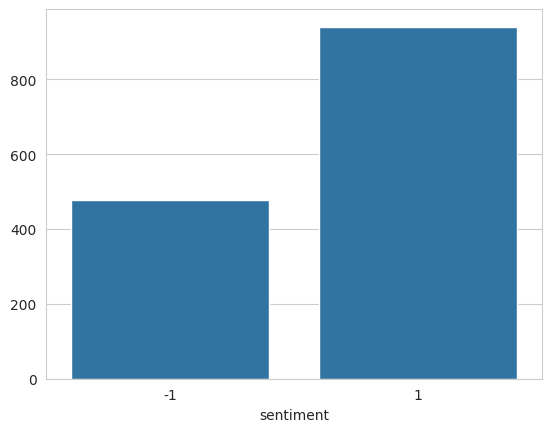

In [366]:
df_new = df[['sentiment']]
result = df_new.groupby(['sentiment']).size()
# plot the result
sns.barplot(x = result.index, y = result.values)

# **Tahapan Preprocessing**

In [367]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Menghapus URL dari kolom konten**

In [368]:
df['Review'] = df['Review'].str.replace('https\S+', ' ', case=False)

**Merubah Teks Jadi Lower Case**

In [369]:
df['Review'] = df['Review'].str.lower()

**Menghapus mention**

In [370]:
df['Review'] = df['Review'].str.replace('@\S+', ' ', case=False)

**Menghapus Hashtag**

In [371]:
df['Review'] = df['Review'].str.replace('#\S+', ' ', case=False)

**Menghapus next karakter**

In [372]:
df['Review'] = df['Review'].str.replace("\'\w+", ' ', case=False)

**Menghapus tanda baca**

In [373]:
df['Review'] = df['Review'].str.replace("[^\w\s]", ' ', case=False)

**Menghapus extra whitespace**

In [374]:
df['Review'] = df['Review'].str.replace("\s(2)", ' ', case=False)

**Tokenization**

In [375]:
# impor word_tokenize dari modul nltk
from nltk.tokenize import word_tokenize

In [376]:
#df['content']=df.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')
df['Review_token']=df['Review'].apply(regexp.tokenize)
df.head(3)

,Rating,Review,sentiment,Review_token
0,1,saya bberapa hari mengantar teman saya mengina...,-1,"[saya, bberapa, hari, mengantar, teman, saya, ..."
1,1,ac kamar tidak dingin. makanan yg dihidangkan ...,-1,"[ac, kamar, tidak, dingin, makanan, yg, dihida..."
2,1,"parkir mobil susah, ada slot lobby tapi ditutu...",-1,"[parkir, mobil, susah, ada, slot, lobby, tapi,..."


# **Filtering (Stopword Removal)**

In [377]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [378]:
from nltk.corpus import stopwords

# Remove stopwords
stopwords_list = nltk.corpus.stopwords.words("indonesian")
df['Review_token'] = df['Review_token'].apply(lambda x: [item for item in x if item not in stopwords_list])
df.head(3)


,Rating,Review,sentiment,Review_token
0,1,saya bberapa hari mengantar teman saya mengina...,-1,"[bberapa, mengantar, teman, menginap, dilayani..."
1,1,ac kamar tidak dingin. makanan yg dihidangkan ...,-1,"[ac, kamar, dingin, makanan, yg, dihidangkan, ..."
2,1,"parkir mobil susah, ada slot lobby tapi ditutu...",-1,"[parkir, mobil, susah, slot, lobby, ditutup, k..."


# **Stemming sastrawi**

In [379]:
!pip install Sastrawi

In [380]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [381]:
# Mendefinisikan fungsi untuk melakukan stemming dan mencetak kata yang sedang di-stem
def stem_and_print(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    for original_token, stemmed_token in zip(tokens, stemmed_tokens):
        print(f"Original: {original_token} - Stemmed: {stemmed_token}")
    return stemmed_tokens

In [ ]:

# Menggunakan fungsi stem_and_print dalam metode apply
df['stemmed'] = df['Review_token'].apply(lambda x: stem_and_print(x))

In [ ]:
df.head(5)

In [ ]:
df['text_string'] = df['stemmed'].apply(lambda x: ' '.join([item for item in x if len(item)>=1]))

In [ ]:
df.head(5)

# **Visualizing Word Clouds**

In [ ]:
!pip install wordcloud

**Positive Review**

In [ ]:
df_p=df[df['sentiment']==1]

In [ ]:
all_words_lem = ' '.join([word for word in df_p['text_string']])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**Negative Reviews**

In [ ]:
df_neg = df[df['sentiment'] == -1]
all_words_lemneg = ' '.join([word for word in df_neg['text_string']])


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lemneg)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer


from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics


# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
X = df['Review']
y = df['sentiment']

# **TF-IDF**

In [ ]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

# **HANDLING IMBALANCE**

In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

# **Split Data into train & test data train 90%, data tes 10%**

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)

# **MODELLING**

**Support vector machine**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Membuat model SVM
svm = SVC()

# Melatih model
svm.fit(X_train, y_train)

# Memprediksi data uji
svm_prediction = svm.predict(X_test)

# Menghitung metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, svm_prediction))

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_prediction))


In [ ]:
def prediksi_sentimen_input():
    # Meminta pengguna untuk memasukkan kalimat
    kalimat = input("Masukkan kalimat yang ingin Anda uji sentimennya: ")

    # Pra-pemrosesan kalimat
    kalimat_tokens = regexp.tokenize(kalimat)
    kalimat_preprocessed = [token for token in kalimat_tokens if token not in stopwords.words("indonesian")]
    kalimat_preprocessed_str = ' '.join(kalimat_preprocessed)  # Gabungkan kata-kata menjadi sebuah string

    # Vektorisasi kalimat
    kalimat_vectorized = tfid.transform([kalimat_preprocessed_str])

    # Prediksi sentimen kalimat
    hasil_prediksi = svm.predict(kalimat_vectorized)

    # Menampilkan hasil prediksi
    if hasil_prediksi == -1:
        print("Kalimat tersebut memiliki sentimen negatif.")
    else:
        print("Kalimat tersebut memiliki sentimen positif.")

# Memanggil fungsi untuk prediksi sentimen dari input pengguna
prediksi_sentimen_input()
